In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('data/data.xls', skipinitialspace=True)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Подготовка данных к обработке

In [3]:
data = data.drop_duplicates()
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
count,4949.000000,4983.000000,4895.000000,4975.000000,4991.000000,4.124000e+03,4.998000e+03,4998.000000,4985.000000,4977.000000,4.511000e+03,4891.000000,4985.000000,4998.000000,4671.000000,4998.000000
mean,139.890079,107.213325,688.679060,639.900905,6556.939892,4.832565e+07,8.347020e+04,9676.941176,1.368907,272.014667,3.974787e+07,2002.468820,1642.998796,6.441056,2.221417,7487.430172
std,121.477586,25.248775,2821.649616,1643.298282,15061.586700,6.796483e+07,1.380866e+05,18165.404578,2.014623,377.776210,2.069689e+08,12.475235,4030.925303,1.124107,1.391185,19290.726563
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,611.500000,5.304835e+06,8.560000e+03,1405.500000,0.000000,64.000000,6.000000e+06,1999.000000,280.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,369.000000,984.000000,2.544575e+07,3.426050e+04,3085.500000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,162.500000
75%,195.000000,118.000000,192.000000,635.000000,11000.000000,6.231942e+07,9.612075e+04,13740.500000,2.000000,324.000000,4.500000e+07,2011.000000,917.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Удаляем из датасета кассовые сборы, так как слишком много пропусков - усреднять нельзя:

In [4]:
data.dropna(axis=0, subset=['gross'], inplace=True)

### Замена отсутствующих значений средними

In [5]:
(data.isnull().sum() / len(data))

color                        0.000485
director_name                0.000727
num_critic_for_reviews       0.000727
duration                     0.000485
director_facebook_likes      0.000727
actor_3_facebook_likes       0.003152
actor_2_name                 0.001455
actor_1_facebook_likes       0.000970
gross                        0.000000
genres                       0.000000
actor_1_name                 0.000970
movie_title                  0.000000
num_voted_users              0.000000
cast_total_facebook_likes    0.000000
actor_3_name                 0.003152
facenumber_in_poster         0.001697
plot_keywords                0.009699
movie_movie_link             0.000000
num_user_for_reviews         0.000242
language                     0.000727
country                      0.000000
content_rating               0.015519
budget                       0.064743
title_year                   0.000727
actor_2_facebook_likes       0.001455
movie_score                  0.000000
aspect_ratio

In [6]:
data['aspect_ratio'] = pd.DataFrame(data['aspect_ratio'].fillna(data.aspect_ratio.mean()))
data['facenumber_in_poster'] = pd.DataFrame(data['facenumber_in_poster'].fillna(data.facenumber_in_poster.mean()))
data['num_critic_for_reviews'] = pd.DataFrame(data['num_critic_for_reviews'].fillna(data.num_critic_for_reviews.mean()))
data['duration'] = pd.DataFrame(data['duration'].fillna(data.duration.mean()))
data['director_facebook_likes'] = pd.DataFrame(data['director_facebook_likes'].fillna(data.director_facebook_likes.mean()))
data['actor_3_facebook_likes'] = pd.DataFrame(data['actor_3_facebook_likes'].fillna(data.actor_3_facebook_likes.mean()))
data['actor_1_facebook_likes'] = pd.DataFrame(data['actor_1_facebook_likes'].fillna(data.actor_1_facebook_likes.mean()))
data['cast_total_facebook_likes'] = pd.DataFrame(data['cast_total_facebook_likes'].fillna(data.cast_total_facebook_likes.mean()))
data['actor_2_facebook_likes'] = pd.DataFrame(data['actor_2_facebook_likes'].fillna(data.actor_2_facebook_likes.mean()))
data['movie_facebook_likes'] = pd.DataFrame(data['movie_facebook_likes'].fillna(data.movie_facebook_likes.mean()))

### Склеивание некоторых категориальных параметров

In [7]:
data.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'Unrated', 'Approved', 'NC-17', nan, 'X',
       'Not Rated', 'TV-MA', 'M', 'GP', 'Passed'], dtype=object)

In [8]:
print(data.shape)
data.dropna(axis=0, subset=['content_rating'], inplace=True)
print(data.shape)

(4124, 28)
(4060, 28)


In [9]:
data['content_rating'] = data['content_rating'].replace(['M'], 'PG')
data['content_rating'] = data['content_rating'].replace(['GP'], 'PG')
data['content_rating'] = data['content_rating'].replace(['X'], 'NC-17')
data['content_rating'] = data['content_rating'].replace(['Approved'], 'R')
data['content_rating'] = data['content_rating'].replace(['Not Rated'], 'R')
data['content_rating'] = data['content_rating'].replace(['Passed'], 'R')
data['content_rating'] = data['content_rating'].replace(['Unrated'], 'R')
data['content_rating'] = data['content_rating'].replace(['TV-MA'], 'R')

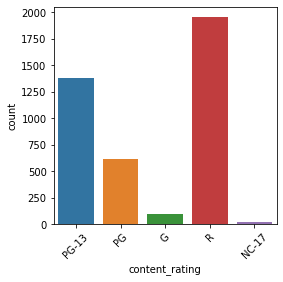

In [10]:
plt.figure(figsize = (4, 4))
sns.countplot(x = 'content_rating', data = data)
xt = plt.xticks(rotation=45)

### Отсекаем лишнее

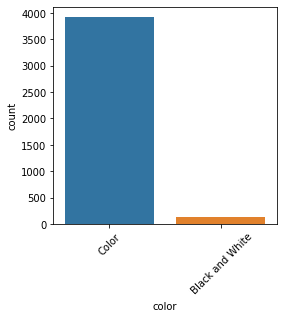

In [11]:
plt.figure(figsize = (4, 4))
sns.countplot(x = 'color', data = data)
xt = plt.xticks(rotation=45)

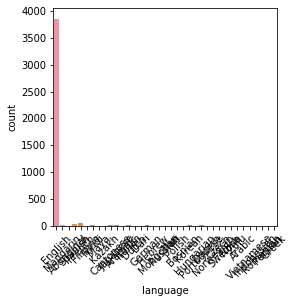

In [12]:
plt.figure(figsize = (4, 4))
sns.countplot(x = 'language', data = data)
xt = plt.xticks(rotation=45)

In [13]:
data = data.drop(['color'], axis=1)
data = data.drop(['language'], axis=1)

In [14]:
def countrify(df):
    if df['country'] == 'USA':
        return 'United States'
    elif df['country'] == 'UK':
        return 'United Kingdom'
    else:
        return 'Misc' 
        
data['country'] = data.apply(countrify, axis=1)

### Определяем наиболее плодотворных режиссёров

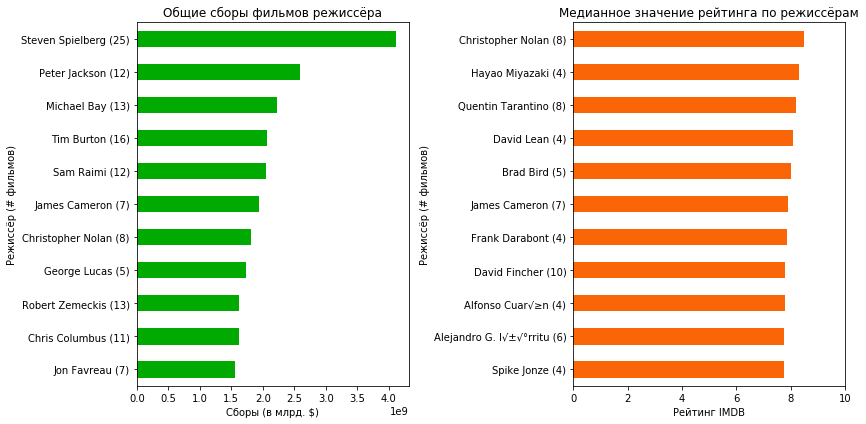

In [15]:
def create_comparison_database(name, value, x, no_films):

    comparison_df = data.groupby(name, as_index=False)

    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    elif x == 'sum':
        comparison_df = comparison_df.sum()

    name_count_key = data[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(
        str) + " (" + comparison_df['films'].astype(str) + ")"

    comp_series = comparison_df[comparison_df['films'] >= no_films][[
        name, value]][10::-1].set_index(name).iloc[:, 0]

    return comp_series


fig = plt.figure(figsize=(18, 6))

plt.subplot2grid((2, 3), (0, 0), rowspan=2)
create_comparison_database('director_name', 'gross', 'sum', 0).plot(
    kind='barh', color='#00aa00')
plt.legend().set_visible(False)
plt.title("Общие сборы фильмов режиссёра")
plt.ylabel("Режиссёр (# фильмов)")
plt.xlabel("Сборы (в млрд. $)")

plt.subplot2grid((2, 3), (0, 1), rowspan=2)
create_comparison_database('director_name', 'movie_score', 'median', 4).plot(
    kind='barh', color='#fa6607')
plt.legend().set_visible(False)
plt.title('Медианное значение рейтинга по режиссёрам')
plt.ylabel("Режиссёр (# фильмов)")
plt.xlabel("Рейтинг IMDB")
plt.xlim(0, 10)

plt.tight_layout()

In [16]:
data.astype('object').describe().transpose()

,count,unique,top,freq
director_name,4057,1825,Steven Spielberg,25
num_critic_for_reviews,4060,529,81,31
duration,4060,157,101,118
director_facebook_likes,4060,408,0,690
actor_3_facebook_likes,4060,893,1000,117
actor_2_name,4058,2390,Morgan Freeman,20
actor_1_facebook_likes,4060,760,1000,371
gross,4060,3973,1.77344e+08,3
genres,4060,779,Drama,178
actor_1_name,4059,1577,Robert De Niro,42


### Отсекаем не очень лишнее
Несмотря на возможную полезность таких категориальных параметров, как имя режиссёров и актёров, придётся удалить данный параметр из выборки, так как такое большое количество уникальных категорий не воспринимает ни одна модель. Вместо этого предлагается использовать такие численные параметры, как количество лайков на страницах актёров и режиссёров в соцсетях.

In [17]:
data.drop(['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'plot_keywords', 'movie_movie_link'], axis=1, inplace=True)

Также удаляем число рецензий, оценки критиков и другие параметры, которые в рамках использования предсказательной системы неизвестны (так как фильм ещё не вышел)

In [18]:
data.drop(['num_critic_for_reviews', 'gross', 'num_voted_users', 'num_user_for_reviews', 'cast_total_facebook_likes'], axis=1, inplace=True)

### Ищем зависимости

Text(0.5, 1.0, 'Распределение рейтинга')

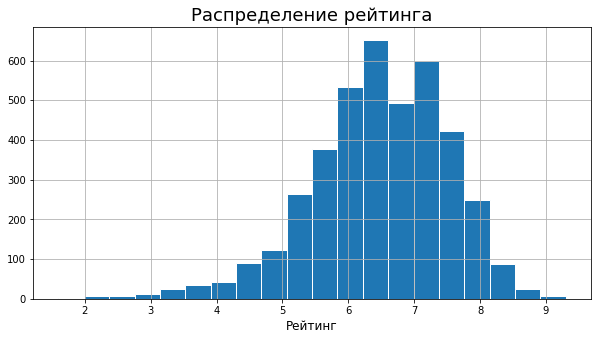

In [25]:
data['movie_score'].hist(bins=20, figsize=(10,5), edgecolor='white',)
plt.xlabel('Рейтинг', fontsize=12)
plt.title('Распределение рейтинга', fontsize=18)

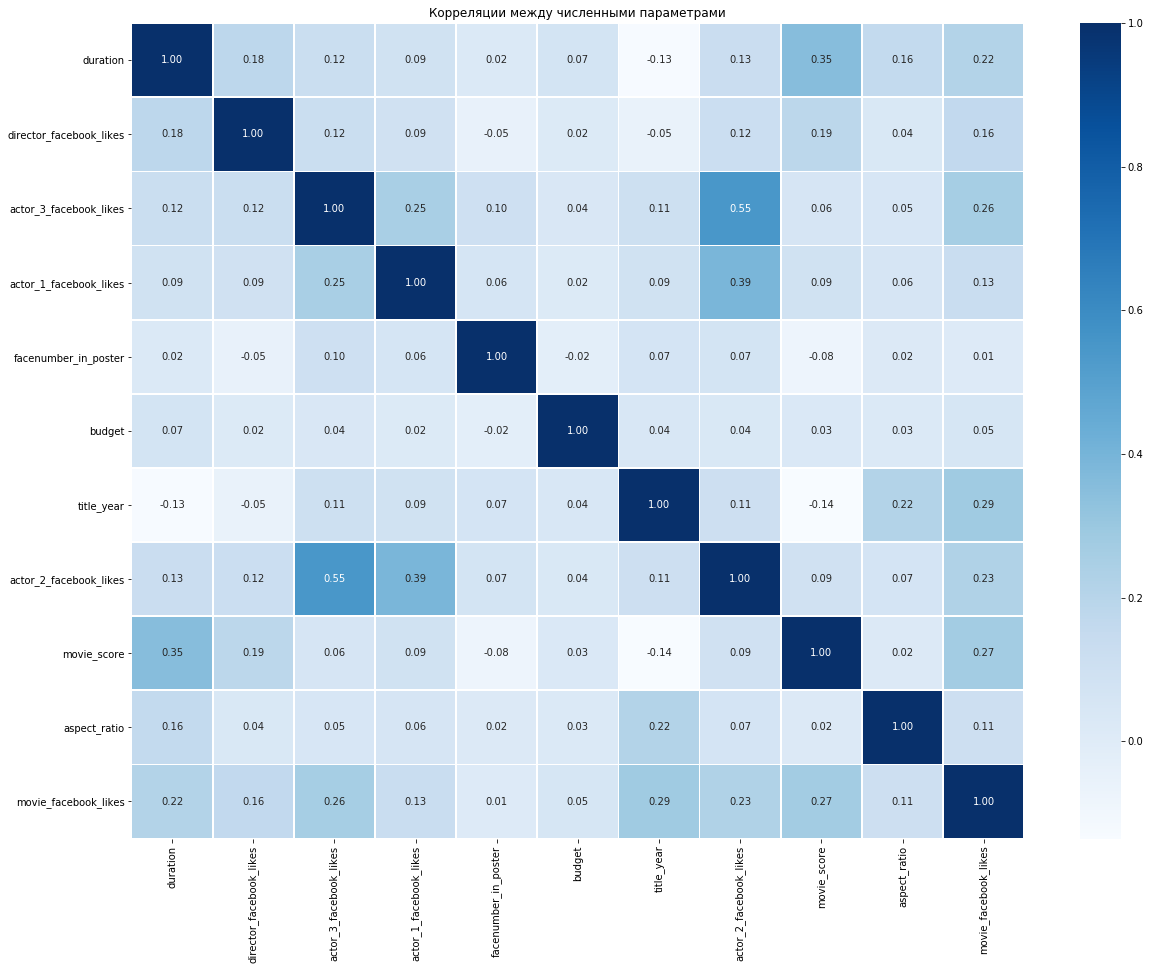

<Figure size 432x288 with 0 Axes>

In [19]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, linewidth=.8,
            fmt=".2f", ax=ax, cmap="Blues")
plt.title("Корреляции между численными параметрами")
plt.show()
plt.tight_layout()

### Конвертируем категориальные параметры

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for column in data.columns:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [21]:
for column in data.columns:
    if data[column].dtype == type(object):        
        oht = OneHotEncoder()
        data[column] = oht.fit_transform(data[column]).toarray()

In [22]:
data.loc[data['movie_score'] > 8.5, 'rating'] = 3
data.loc[data['movie_score'] <= 8.5, 'rating'] = 2
data.loc[data['movie_score'] <= 7, 'rating'] = 1
data.loc[data['movie_score'] <= 5.5, 'rating'] = 0
data.head()

,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,facenumber_in_poster,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,rating
0,178.0,0.0,855.0,1000.0,93,0.0,2,3,237000000.0,2009.0,936.0,7.9,1.78,33000,2.0
1,169.0,563.0,1000.0,40000.0,87,0.0,2,3,300000000.0,2007.0,5000.0,7.1,2.35,0,2.0
2,148.0,0.0,161.0,11000.0,109,1.0,1,3,245000000.0,2015.0,393.0,6.8,2.35,85000,1.0
3,164.0,22000.0,23000.0,27000.0,249,0.0,2,3,250000000.0,2012.0,23000.0,8.5,2.35,164000,2.0
5,132.0,475.0,530.0,640.0,107,1.0,2,3,263700000.0,2012.0,632.0,6.6,2.35,24000,1.0


### Создание модели

In [23]:
from sklearn.model_selection import train_test_split


y = data.rating
X = data.drop(['rating', 'movie_score'], axis=1)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=4074)

cats = [4, 6, 7]

In [24]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(
    thread_count=12,
    iterations=850,
    learning_rate=0.02,
    depth=4,
    random_seed=420694050,
    custom_loss=['AUC', 'Accuracy'],
    use_best_model=True
)
model.fit(
    X_train, y_train,
    cat_features=cats,
    eval_set=(X_validation, y_validation),
    logging_level='Silent',
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))